# Reference number: 170321_1_1

Reference number = 'date'+'id_client'+'id_transaction'

Status: **active**.

This virtual document aims to provide guidance and reference for...

### Import functions and set initial conditions 

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime, date
from financial_mathematics.financial_functions import *


ImportError: No module named 'financial_functions.financial_functions'; 'financial_functions' is not a package

In [2]:

# Set initial conditions 


initial_date = 'Sep 21 2016'
final_date   = 'Mar 21 2017'

# interest rate specif.
rate_specifics = {
    'rate':10.6492 / 100,
    'cap':12
}

# terms and conditions 
pacted_terms = debt(initial_date = initial_date, 
                    final_date   = final_date,
                    capital = 6000, 
                    rate = rate_specifics)


### Time variables description

[ add description]

In [3]:
# Time considerations 

string = '\nInitial_date: {}\nActual date:  {}\nEnd date:     {}\n\nRemaining days: {}'

print(string.format(pacted_terms.initial_date.strftime('%b %d %Y'),
                    pacted_terms.actual_date.strftime('%b %d %Y'),
                    pacted_terms.final_date.strftime('%b %d %Y'),
                    pacted_terms.daysToGo()))



Initial_date: Sep 21 2016
Actual date:  Dec 19 2016
End date:     Mar 21 2017

Remaining days: 92


### Capital description 

[ add description ]

In [4]:
# Capital considerations 

string = '\nStarting capital: {}\nFinal capital:    {}\n\nAnnual interest rate with monthly capitalization: {} %'

print(string.format(pacted_terms.capital, pacted_terms.final_capital,  round(100*pacted_terms.annualRate('1m'),4)))
print('Discount rate available (anual with monthly cap.): {} %'.format(round(100*pacted_terms.discountRate('1m'),2)))


Starting capital: 6000
Final capital:    6328.51

Annual interest rate with monthly capitalization: 10.6492 %
Discount rate available (anual with monthly cap.): 5.51 %


**Note**: The discount rate is defined as the risk-free reference rate (more information [here](http://www.banxico.org.mx/SieInternet/consultarDirectorioInternetAction.do?accion=consultarCuadro&idCuadro=CF107&sector=22&locale=es)).

### Payment Scheme 

[ add description ]

In [6]:

tentative_dates = ['Dec 21 2016','Jan 21 2017','Feb 21 2017','Mar 21 2017']
early_payment = []
for td in tentative_dates:
    early_payment.append(round(pacted_terms.payDebt(td),2))

core = {'Dates':tentative_dates, 'Payment':early_payment}

payment_reference = pd.DataFrame(core)[['Dates', 'Payment']]
payment_reference['MXN_discount'] = pacted_terms.final_capital - payment_reference.Payment
payment_reference['Relative_discount (%)'] = np.round(100*(payment_reference.MXN_discount / pacted_terms.final_capital), 4)
payment_reference['Delta_days'] = [pacted_terms.diffDates(d,pacted_terms.final_date.strftime('%b %d %Y')) for d in tentative_dates]
payment_reference

,Dates,Payment,MXN_discount,Relative_discount (%),Delta_days
0,Dec 21 2016,6242.12,86.39,1.3651,90
1,Jan 21 2017,6271.74,56.77,0.8971,59
2,Feb 21 2017,6301.50,27.01,0.4268,28
3,Mar 21 2017,6328.51,0.00,0.0000,0


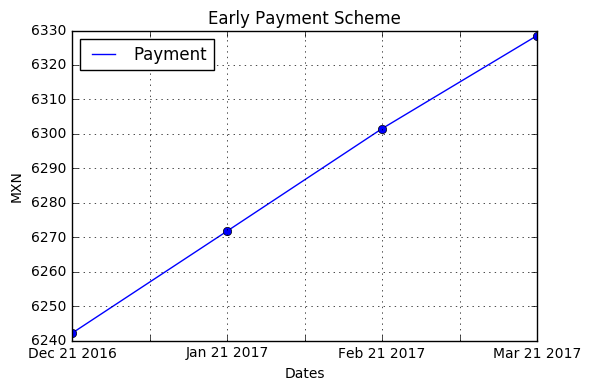

In [59]:

payment_reference.plot(x='Dates', y='Payment')
plt.plot(payment_reference.Payment, 'ob')
plt.grid()
plt.ylabel('MXN')
plt.title('Early Payment Scheme')